# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [15]:
# import NYC restaurant inspections data and assign to variable
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,05/06/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,05/06/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,05/06/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,05/06/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,05/06/2019,Cycle Inspection / Initial Inspection


In [12]:
# data points that have a lot of null values across the board are new restaurants (per documentation, new restaurants have Inspection Date 1/1/1900)
df.tail()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
383295,50092236,EUPHORIA,BROOKLYN,834,62ND ST,11220.0,7188333999,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383296,50092238,NaN,BROOKLYN,8502,3RD AVE,11209.0,7189211900,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383297,50092239,NaN,STATEN ISLAND,400,VICTORY BLVD,10301.0,3476999546,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383298,50092241,NaN,BROOKLYN,776,4TH AVE,11232.0,7184314294,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN
383299,50092243,TRIO PIZZA & GRILL,BROOKLYN,1907,AVENUE U,11229.0,6464798705,Other,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,05/06/2019,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383300 entries, 0 to 383299
Data columns (total 18 columns):
CAMIS                    383300 non-null int64
DBA                      382759 non-null object
BORO                     383300 non-null object
BUILDING                 383071 non-null object
STREET                   383297 non-null object
ZIPCODE                  377777 non-null float64
PHONE                    383282 non-null object
CUISINE DESCRIPTION      383300 non-null object
INSPECTION DATE          383300 non-null object
ACTION                   382032 non-null object
VIOLATION CODE           377576 non-null object
VIOLATION DESCRIPTION    374811 non-null object
CRITICAL FLAG            383300 non-null object
SCORE                    365258 non-null float64
GRADE                    193019 non-null object
GRADE DATE               190720 non-null object
RECORD DATE              383300 non-null object
INSPECTION TYPE          382032 non-null object
dtypes: float64(2), int6

# Data Cleaning

In [16]:
# look at number of null values
df.isnull().sum()

CAMIS                         0
DBA                         541
BORO                          0
BUILDING                    229
STREET                        3
ZIPCODE                    5523
PHONE                        18
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1268
VIOLATION CODE             5724
VIOLATION DESCRIPTION      8489
CRITICAL FLAG                 0
SCORE                     18042
GRADE                    190281
GRADE DATE               192580
RECORD DATE                   0
INSPECTION TYPE            1268
dtype: int64

Text(0.5, 1.0, 'Missing Data')

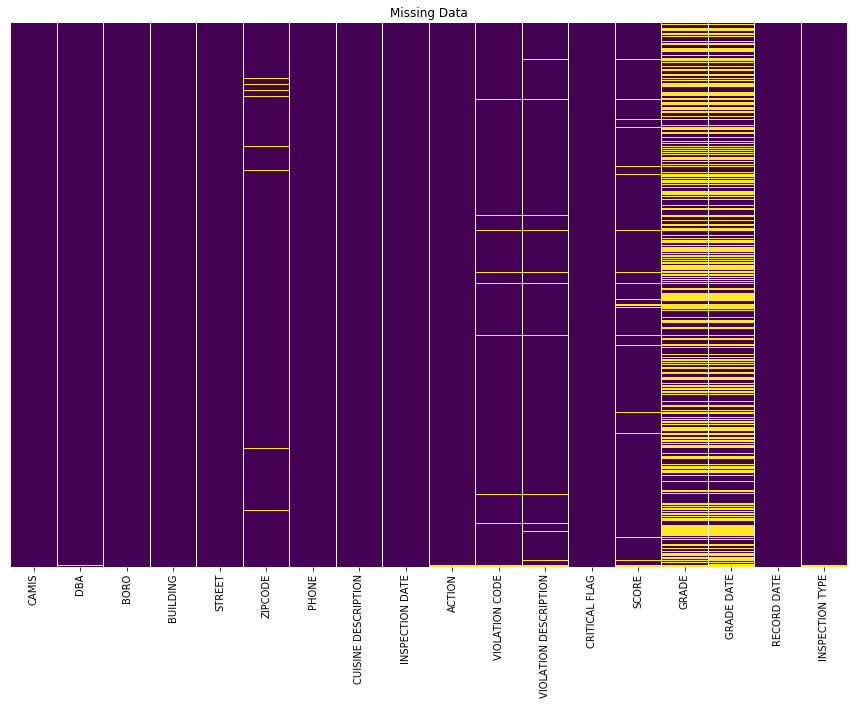

In [17]:
# visualize null values in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [19]:
# drop rows where inspection date = 01/01/1900 - showed before how these are contributing to number of null values
df = df[df['INSPECTION DATE'] != '01/01/1900']

In [20]:
# relook at number of null values - decreased across the board
df.isnull().sum()

CAMIS                         0
DBA                           4
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             4456
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                    189013
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [21]:
# removing new restaurants decreased overall dataset by 1268 data points
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382032 entries, 0 to 383260
Data columns (total 18 columns):
CAMIS                    382032 non-null int64
DBA                      382028 non-null object
BORO                     382032 non-null object
BUILDING                 381811 non-null object
STREET                   382032 non-null object
ZIPCODE                  376519 non-null float64
PHONE                    382019 non-null object
CUISINE DESCRIPTION      382032 non-null object
INSPECTION DATE          382032 non-null object
ACTION                   382032 non-null object
VIOLATION CODE           377576 non-null object
VIOLATION DESCRIPTION    374811 non-null object
CRITICAL FLAG            382032 non-null object
SCORE                    365258 non-null float64
GRADE                    193019 non-null object
GRADE DATE               190720 non-null object
RECORD DATE              382032 non-null object
INSPECTION TYPE          382032 non-null object
dtypes: float64(2), int6

In [22]:
# look at the unique values of the Grade column
df['GRADE'].unique()

array(['A', nan, 'B', 'C', 'P', 'Z', 'Not Yet Graded', 'G'], dtype=object)

In [24]:
# look at the data points where Grade is null
df[df.GRADE.isnull() == True].groupby(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE']).agg({
        'CUISINE DESCRIPTION': 'first',
        'ACTION': 'unique',
        'VIOLATION CODE': 'nunique',
        'VIOLATION DESCRIPTION': 'nunique',
        'CRITICAL FLAG': 'nunique',
        'SCORE': 'mean',
        'GRADE': 'unique',
        'GRADE DATE': 'unique',
        'RECORD DATE': 'unique',
        'INSPECTION TYPE': 'unique'})

CUISINE DESCRIPTION  \
CAMIS    DBA                            BORO          BUILDING STREET              ZIPCODE PHONE      INSPECTION DATE                                                      
30112340 WENDY'S                        BROOKLYN      469      FLATBUSH AVENUE     11225.0 7182875005 04/12/2016                                              Hamburgers   
                                                                                                      04/30/2016                                              Hamburgers   
                                                                                                      06/26/2017                                              Hamburgers   
                                                                                                      10/03/2016                                              Hamburgers   
30191841 DJ REYNOLDS PUB AND RESTAURANT MANHATTAN     351      WEST   57 STREET    10019.0 2122452912 07/27/2017                                                   Irish   
                                                                                                      08/31/2015                                                   Irish   
40356018 RIVIERA CATERERS               BROOKLYN      2780     STILLWELL AVENUE    11224.0 7183723031 07/20/2017                                                American   
40356151 BRUNOS ON THE BOULEVARD        QUEENS        8825     ASTORIA BOULEVARD   11369.0 7183350505 08/19/2017                                                American   
                                                                                                      10/06/2018                                                American   
40359705 NATHAN'S FAMOUS                BROOKLYN      1310     SURF AVENUE         11224.0 7183332202 06/01/2016                                                 Hotdogs   
40360045 SEUDA FOODS                    BROOKLYN      705      KINGS HIGHWAY       11223.0 7183751500 03/13/2017                                           Jewish/Kosher   
                                                                                                      08/08/2016                                           Jewish/Kosher   
40360076 CARVEL ICE CREAM               BROOKLYN      203      CHURCH AVENUE       11218.0 7184389501 03/20/2019                         Ice Cream, Gelato, Yogurt, Ices   
40361322 CARVEL ICE CREAM               QUEENS        26515    HILLSIDE AVENUE     11004.0 7183430392 03/28/2018                         Ice Cream, Gelato, Yogurt, Ices   
40361618 SAL'S DELI                     QUEENS        12908    20 AVENUE           11356.0 7186619498 01/28/2016                                            Delicatessen   
                                                                                                      07/23/2015                                            Delicatessen   
                                                                                                      12/01/2017                                            Delicatessen   
40362264 P & S DELI GROCERY             MANHATTAN     730      COLUMBUS AVENUE     10025.0 2129323030 05/16/2018                                                American   
                                                                                                      06/05/2017                                                American   
                                                                                                      07/10/2018                                                American   
                                                                                                      11/07/2018                                                American   
40362274 ANGELIKA FILM CENTER           MANHATTAN     18       WEST HOUSTON STREET 10012.0 2129952570 01/02/2019                                                American   
                     

In [25]:
# fill in Grade null values with 'Not Yet Graded' - based on grading criteria on DOHMH, a grade is not given if poor scores, new restaurants not open to public yet, or those hoping to reopen - so those who do not have an A(did not pass inspection process)
df.GRADE = df.GRADE.fillna('Not Yet Graded')

In [26]:
df.isnull().sum()

CAMIS                         0
DBA                           4
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             4456
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                         0
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [27]:
# look at the null values in DBA (restaurant name)
df[df.DBA.isnull() == True]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
383257,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection
383258,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection
383259,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection
383260,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584,Other,03/30/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,27.0,Not Yet Graded,NaN,05/06/2019,Inter-Agency Task Force / Initial Inspection


In [28]:
# fill in the null values in DBA with the location address - all the same location
df.DBA = df.DBA.fillna('1634 NOSTRAND AVE BROOKLYN')

In [31]:
# look at null values for Violation Code and Descriptions
df[(df['VIOLATION CODE'].isnull() == True) | (df['VIOLATION DESCRIPTION'].isnull() == True)]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
28,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/12/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,Not Yet Graded,NaN,05/06/2019,Cycle Inspection / Initial Inspection
86,40359480,1 EAST 66TH STREET KITCHEN,MANHATTAN,1,EAST 66 STREET,10065.0,2128793900,American,05/06/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,05/06/2016,05/06/2019,Cycle Inspection / Initial Inspection
276,40362869,SHASHEMENE INT'L RESTAURANT,BROOKLYN,195,EAST 56 STREET,11203.0,3474300871,Caribbean,04/28/2018,Violations were cited in the following area(s).,15F,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Smoke-Free Air Act / Initial Inspection
277,40362869,SHASHEMENE INT'L RESTAURANT,BROOKLYN,195,EAST 56 STREET,11203.0,3474300871,Caribbean,04/28/2018,Violations were cited in the following area(s).,15F,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Smoke-Free Air Act / Initial Inspection
296,40363098,DUNKIN' DONUTS,BROOKLYN,56,COURT STREET,11201.0,7186252068,Donuts,02/12/2018,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Administrative Miscellaneous / Initial Inspection
415,40363744,SONNY'S HEROS,BROOKLYN,1031,EAST 92 STREET,11236.0,7184859810,American,05/11/2017,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,05/11/2017,05/06/2019,Cycle Inspection / Initial Inspection
656,40364389,OLD TOWN BAR & RESTAURANT,MANHATTAN,45,EAST 18 STREET,10003.0,2125296732,American,04/04/2019,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Administrative Miscellaneous / Initial Inspection
757,40364449,GOTTSCHEER HALL,QUEENS,657,FAIRVIEW AVENUE,11385.0,7183663030,German,04/20/2018,Violations were cited in the following area(s).,15F,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Smoke-Free Air Act / Initial Inspection
915,40364681,TOWNE CAFE,BROOKLYN,2602,EAST 15 STREET,11235.0,5162419888,American,05/24/2017,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Administrative Miscellaneous / Initial Inspection
952,40364715,OLD HOMESTEAD,MANHATTAN,56,9 AVENUE,10011.0,2122429040,American,11/17/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,Not Yet Graded,NaN,05/06/2019,Trans Fat / Compliance Inspection


In [32]:
# fill in the null values in Violation Code column with 'None' because the Action columns describe that no violations were found during the citation
# will be dropping Violation Description column in another step
df['VIOLATION CODE'] = df['VIOLATION CODE'].fillna('None')

In [33]:
df.isnull().sum()

CAMIS                         0
DBA                           0
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE                0
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                         0
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [7]:
# look at value counts of Record Date - all the same values
df['RECORD DATE'].value_counts()

05/06/2019    383300
Name: RECORD DATE, dtype: int64

In [8]:
# look at value counts of Inspection Type
df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          224242
Cycle Inspection / Re-inspection                                90118
Pre-permit (Operational) / Initial Inspection                   27018
Pre-permit (Operational) / Re-inspection                        11723
Administrative Miscellaneous / Initial Inspection                6999
Cycle Inspection / Reopening Inspection                          4249
Pre-permit (Non-operational) / Initial Inspection                3467
Smoke-Free Air Act / Initial Inspection                          2795
Administrative Miscellaneous / Re-inspection                     2097
Trans Fat / Initial Inspection                                   1909
Pre-permit (Operational) / Compliance Inspection                 1155
Calorie Posting / Initial Inspection                             1143
Pre-permit (Operational) / Reopening Inspection                   992
Inter-Agency Task Force / Initial Inspection                      980
Cycle Inspection / C

In [ ]:
df.head()

In [ ]:
# look at null values under Score
df_sub = df.groupby(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE']).agg({
        'CUISINE DESCRIPTION': 'first',
        'ACTION': 'unique',
        'VIOLATION CODE': 'nunique',
        'VIOLATION DESCRIPTION': 'nunique',
        'CRITICAL FLAG': 'nunique',
        'SCORE': 'mean',
        'GRADE': 'unique',
        'GRADE DATE': 'unique',
        'RECORD DATE': 'unique',
        'INSPECTION TYPE': 'unique'
}).reset_index()

In [ ]:
df_sub.head()

In [ ]:
df_sub.isnull().sum()

In [ ]:
df.info()

In [ ]:
# look at number of null values again in dataset
df.isnull().sum()

In [ ]:
# drop unnecessary columns
data = df.drop(['PHONE', 'ACTION', 'RECORD DATE', 'VIOLATION DESCRIPTION', 'GRADE DATE', 'INSPECTION TYPE'], axis=1).copy()

In [ ]:
data.head()

### Looking at Only the Restaurants

In [ ]:
# create subset of data called restaurants
restaurants = df.loc[:, 'CAMIS':'PHONE'].copy()

In [ ]:
restaurants.info()

In [ ]:
# look at number of null values
restaurants.isnull().sum()

In [ ]:
# group each listing to show the unique restaurants in dataset (CAMIS is unique identifier for a restaurant)
restaurant_group = restaurants.groupby('CAMIS').agg({'DBA': 'first', 'BORO': 'first', 'BUILDING': 'first', 'STREET': 'first', 'ZIPCODE': 'first', 'PHONE': 'first'}).reset_index()

In [ ]:
restaurant_group.isnull().sum()

In [ ]:
restaurant_group.head()

In [ ]:
# look at the restaurant which has a null value in DBA
restaurant_group[restaurant_group['DBA'].isnull() == True]

#### Looking at Violation Codes and Descriptions

In [ ]:
# create separate table of violations mapping violation codes with violation descriptions
violations = df.loc[:, 'VIOLATION CODE':'VIOLATION DESCRIPTION'].copy()

In [ ]:
violations.head()

In [ ]:
violations = violations.groupby(['VIOLATION CODE', 'VIOLATION DESCRIPTION']).count().reset_index()

In [ ]:
violations.head()

### Back to Full Dataset

In [ ]:
# fill in null value in overall dataset with address information from other columns
data.DBA = data.DBA.fillna('1634 Nostrand Ave Brooklyn')

In [ ]:
# review null value counts again
data.isnull().sum()

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
# convert Inspection Date column into datetime type
data['INSPECTION DATE'] = pd.to_datetime(data['INSPECTION DATE'])

In [ ]:
# split Inspection Date column into month and year columns
data['INSPECTION MONTH'] = data['INSPECTION DATE'].dt.month
data['INSPECTION YEAR'] = data['INSPECTION DATE'].dt.year

In [ ]:
data.head()

In [ ]:
# bin values in Grade into A (=1)  or not A (=0)
data.loc[data['GRADE']=='A', 'GRADE'] = 1
data.loc[data['GRADE'] != 'A', 'GRADE'] = 0

In [ ]:
data.head()

#### Option 1: With Dummies

In [ ]:
# create dummy variables of critical flag column
flag_dummies = pd.get_dummies(data['CRITICAL FLAG'])

In [ ]:
flag_dummies.head()

In [ ]:
# concatenate flag_dummies back into main dataframe
data2 = pd.concat([data, flag_dummies], axis=1)

In [ ]:
data2.head()

In [ ]:
# create dummy variables of violation code column
violation_dummies = pd.get_dummies(data['VIOLATION CODE'], prefix='VIOLATION_')

In [ ]:
violation_dummies.head()

In [ ]:
# concatenate violation_dummies back into main dataframe
data3 = pd.concat([data2, violation_dummies], axis=1)

In [ ]:
data3.head()

In [ ]:
data3.columns

In [ ]:
data3 = data3.drop(['INSPECTION DATE', 'VIOLATION CODE', 'CRITICAL FLAG'], axis=1)

In [ ]:
data3.head()

In [ ]:
# reorganize the order of the columns
data3 = data3[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Critical', 'Not Applicable', 'Not Critical',
 'VIOLATION__02A', 'VIOLATION__02B', 'VIOLATION__02C', 'VIOLATION__02D', 'VIOLATION__02E', 'VIOLATION__02F', 'VIOLATION__02G',
 'VIOLATION__02H', 'VIOLATION__02I', 'VIOLATION__02J', 'VIOLATION__03A', 'VIOLATION__03B', 'VIOLATION__03C', 'VIOLATION__03D',
 'VIOLATION__03E', 'VIOLATION__03F', 'VIOLATION__03G', 'VIOLATION__04A', 'VIOLATION__04B', 'VIOLATION__04C', 'VIOLATION__04D',
 'VIOLATION__04E', 'VIOLATION__04F', 'VIOLATION__04G', 'VIOLATION__04H', 'VIOLATION__04I', 'VIOLATION__04J', 'VIOLATION__04K',
 'VIOLATION__04L', 'VIOLATION__04M', 'VIOLATION__04N', 'VIOLATION__04O', 'VIOLATION__05A', 'VIOLATION__05B', 'VIOLATION__05C',
 'VIOLATION__05D', 'VIOLATION__05E', 'VIOLATION__05F', 'VIOLATION__05H', 'VIOLATION__06A', 'VIOLATION__06B', 'VIOLATION__06C',
 'VIOLATION__06D', 'VIOLATION__06E', 'VIOLATION__06F', 'VIOLATION__06G', 'VIOLATION__06H', 'VIOLATION__06I', 'VIOLATION__07A',
 'VIOLATION__08A', 'VIOLATION__08B', 'VIOLATION__08C', 'VIOLATION__09A', 'VIOLATION__09B', 'VIOLATION__09C', 'VIOLATION__10A',
 'VIOLATION__10B', 'VIOLATION__10C', 'VIOLATION__10D', 'VIOLATION__10E', 'VIOLATION__10F', 'VIOLATION__10G', 'VIOLATION__10H',
 'VIOLATION__10I', 'VIOLATION__10J', 'VIOLATION__15A', 'VIOLATION__15E', 'VIOLATION__15F', 'VIOLATION__15G', 'VIOLATION__15I',
 'VIOLATION__15J', 'VIOLATION__15K', 'VIOLATION__15L', 'VIOLATION__15S', 'VIOLATION__15T', 'VIOLATION__16A', 'VIOLATION__16B',
 'VIOLATION__16C', 'VIOLATION__16D', 'VIOLATION__16E', 'VIOLATION__16F', 'VIOLATION__17A', 'VIOLATION__18B', 'VIOLATION__18C',
 'VIOLATION__18D', 'VIOLATION__18F', 'VIOLATION__18G', 'VIOLATION__19A', 'VIOLATION__20A',
 'VIOLATION__20B', 'VIOLATION__20D', 'VIOLATION__20E', 'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C', 
'VIOLATION__22E', 'VIOLATION__22F', 'VIOLATION__22G', 'INSPECTION MONTH', 'INSPECTION YEAR', 'SCORE', 'GRADE']]

In [ ]:
data3.head()

In [ ]:
# group citations based on restaurant id (CAMIS), inspection month, and inspection year
data4 = data3.groupby(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'ZIPCODE', 'INSPECTION MONTH', 'INSPECTION YEAR']).agg({
                    'CUISINE DESCRIPTION': 'first', 'Critical': 'sum', 'Not Applicable': 'sum', 'Not Critical': 'sum',
                    'VIOLATION__02A': 'sum', 'VIOLATION__02B': 'sum', 'VIOLATION__02C': 'sum', 'VIOLATION__02D': 'sum', 
                    'VIOLATION__02E': 'sum', 'VIOLATION__02F': 'sum', 'VIOLATION__02G': 'sum', 'VIOLATION__02H': 'sum', 
                    'VIOLATION__02I': 'sum', 'VIOLATION__02J': 'sum', 'VIOLATION__03A': 'sum', 'VIOLATION__03B': 'sum', 
                    'VIOLATION__03C': 'sum', 'VIOLATION__03D': 'sum', 'VIOLATION__03E': 'sum', 'VIOLATION__03F': 'sum', 
                    'VIOLATION__03G': 'sum', 'VIOLATION__04A': 'sum', 'VIOLATION__04B': 'sum', 'VIOLATION__04C': 'sum', 
                    'VIOLATION__04D': 'sum', 'VIOLATION__04E': 'sum', 'VIOLATION__04F': 'sum', 'VIOLATION__04G': 'sum', 
                    'VIOLATION__04H': 'sum', 'VIOLATION__04I': 'sum', 'VIOLATION__04J': 'sum', 'VIOLATION__04K': 'sum',
                     'VIOLATION__04L': 'sum', 'VIOLATION__04M': 'sum', 'VIOLATION__04N': 'sum', 'VIOLATION__04O': 'sum', 
                    'VIOLATION__05A': 'sum', 'VIOLATION__05B': 'sum', 'VIOLATION__05C': 'sum', 'VIOLATION__05D': 'sum', 
                    'VIOLATION__05E': 'sum', 'VIOLATION__05F': 'sum', 'VIOLATION__05H': 'sum', 'VIOLATION__06A': 'sum', 
                    'VIOLATION__06B': 'sum', 'VIOLATION__06C': 'sum', 'VIOLATION__06D': 'sum', 'VIOLATION__06E': 'sum', 
                    'VIOLATION__06F': 'sum', 'VIOLATION__06G': 'sum', 'VIOLATION__06H': 'sum', 'VIOLATION__06I': 'sum', 
                    'VIOLATION__07A': 'sum', 'VIOLATION__08A': 'sum', 'VIOLATION__08B': 'sum', 'VIOLATION__08C': 'sum', 
                    'VIOLATION__09A': 'sum', 'VIOLATION__09B': 'sum', 'VIOLATION__09C': 'sum', 'VIOLATION__10A': 'sum',
                    'VIOLATION__10B': 'sum', 'VIOLATION__10C': 'sum', 'VIOLATION__10D': 'sum', 'VIOLATION__10E': 'sum', 
                    'VIOLATION__10F': 'sum', 'VIOLATION__10G': 'sum', 'VIOLATION__10H': 'sum', 'VIOLATION__10I': 'sum', 
                    'VIOLATION__10J': 'sum', 'VIOLATION__15A': 'sum', 'VIOLATION__15E': 'sum', 'VIOLATION__15F': 'sum', 
                    'VIOLATION__15G': 'sum', 'VIOLATION__15I': 'sum', 'VIOLATION__15J': 'sum', 'VIOLATION__15K': 'sum', 
                    'VIOLATION__15L': 'sum', 'VIOLATION__15S': 'sum', 'VIOLATION__15T': 'sum', 'VIOLATION__16A': 'sum', 
                    'VIOLATION__16B': 'sum', 'VIOLATION__16C': 'sum', 'VIOLATION__16D': 'sum', 'VIOLATION__16E': 'sum', 
                    'VIOLATION__16F': 'sum', 'VIOLATION__17A': 'sum', 'VIOLATION__18B': 'sum', 'VIOLATION__18C': 'sum',
                    'VIOLATION__18D': 'sum', 'VIOLATION__18F': 'sum', 'VIOLATION__18G': 'sum', 'VIOLATION__19A': 'sum', 
                    'VIOLATION__20A': 'sum', 'VIOLATION__20B': 'sum', 'VIOLATION__20D': 'sum', 'VIOLATION__20E': 'sum',
                    'VIOLATION__20F': 'sum', 'VIOLATION__22A': 'sum', 'VIOLATION__22B': 'sum', 'VIOLATION__22C': 'sum', 
                    'VIOLATION__22E': 'sum', 'VIOLATION__22F': 'sum', 'VIOLATION__22G': 'sum'}).reset_index()

In [ ]:
data4.head()

In [ ]:
data4.tail()

In [ ]:
data4.shape

In [ ]:
data4.describe()

#### Option 2: No Dummies

In [ ]:
data.head()

In [ ]:
# create new dataframe while dropping Inspection Date
data5 = data.drop(['INSPECTION DATE'], axis=1).copy()

In [ ]:
data5.columns

In [ ]:
data5 = data5[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'CUISINE DESCRIPTION', 'VIOLATION CODE', 'CRITICAL FLAG', 
       , 'INSPECTION MONTH', 'INSPECTION YEAR', 'SCORE', 'GRADE']]